# **Association Rule Mining: Apriori Algorithm** #
### **<u>DEFINITION</u>** ###
<b>Support</b>
- Support is the default popularity of an item over the total transaction.
- Support just indicate probability of the item.

<b>Confidence</b>
-  High confidence indicates a high likelihood that the consequent will occur when the antecedent is present.

<b>Lift</b>
- Indicates how much more likely the consequent is given the antecedent, compared to if they were independent.


#### **TUTORIAL VIDEO** ####
- https://youtu.be/WGlMlS_Yydk?si=y5wtO67kmpMwmCVL

In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules
from typing import Optional

def apriori_rules(df:pd.DataFrame, column:str, min_support:Optional[float]=0.5, 
                  min_threshold:Optional[float]=0.7, plot:Optional[bool]=False, 
                  figsize:Optional[tuple]=(10,6)) -> pd.DataFrame:
    """
    Generate association rules for a given dataframe and column

    Args:
    df: DataFrame
    column: str
    min_support: float, optional
    min_threshold: float, optional

    Returns:
    DataFrame
    """
    factors_data = [[]] * len(df[column])

    for i in range(len(df[column])):
        if df[column][i] is not np.nan:
            factors_data[i] = df[column][i].split(';')
        else:
            factors_data[i] = []

    te = TransactionEncoder()
    te_ary = te.fit(factors_data).transform(factors_data)
    factors_df = pd.DataFrame(te_ary, columns=te.columns_)

    
    frequent_itemsets = apriori(factors_df, min_support=min_support, use_colnames=True)
    frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(lambda x: len(x))
    print((frequent_itemsets).sort_values(by='support', ascending=False))

    rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)

    if plot:

        plt.figure(figsize=figsize)
        support_values = frequent_itemsets['support']
        itemsets = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x))
        plt.barh(itemsets, support_values, color='salmon')
        plt.xlabel('Support')
        plt.title('Frequent Itemsets')
        plt.show()

    return rules

### **<u>Deciding factors to buy car</u>** ###

    support                                 itemsets  length
3      0.88                                  (Price)       1
1      0.68                             (Brand name)       1
2      0.68                          (Functionality)       1
5      0.64                 (Technological features)       1
0      0.62                             (Aesthetics)       1
8      0.62                      (Brand name, Price)       2
10     0.60                   (Functionality, Price)       2
13     0.60          (Technological features, Price)       2
6      0.58                      (Aesthetics, Price)       2
4      0.52                                   (Size)       1
11     0.52  (Functionality, Technological features)       2
7      0.50              (Functionality, Brand name)       2
9      0.50     (Brand name, Technological features)       2
12     0.50                            (Size, Price)       2


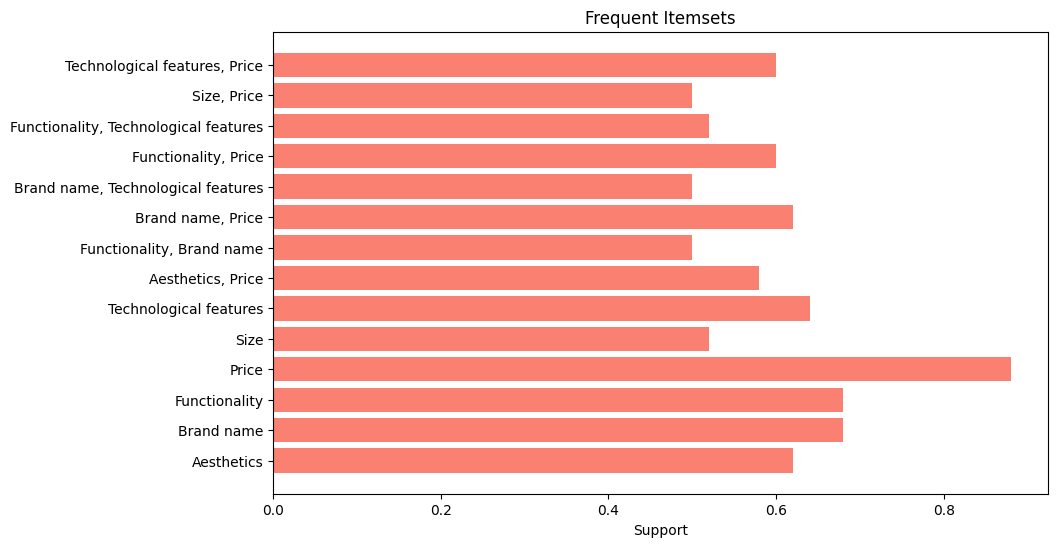

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Aesthetics),(Price),0.62,0.88,0.58,0.935484,1.063050,0.0344,1.860000,0.156080
1,(Price),(Aesthetics),0.88,0.62,0.58,0.659091,1.063050,0.0344,1.114667,0.494253
2,(Functionality),(Brand name),0.68,0.68,0.50,0.735294,1.081315,0.0376,1.208889,0.235000
3,(Brand name),(Functionality),0.68,0.68,0.50,0.735294,1.081315,0.0376,1.208889,0.235000
4,(Brand name),(Price),0.68,0.88,0.62,0.911765,1.036096,0.0216,1.360000,0.108871
5,(Price),(Brand name),0.88,0.68,0.62,0.704545,1.036096,0.0216,1.083077,0.290323
6,(Brand name),(Technological features),0.68,0.64,0.50,0.735294,1.148897,0.0648,1.360000,0.405000
7,(Technological features),(Brand name),0.64,0.68,0.50,0.781250,1.148897,0.0648,1.462857,0.360000
8,(Functionality),(Price),0.68,0.88,0.60,0.882353,1.002674,0.0016,1.020000,0.008333
9,(Price),(Functionality),0.88,0.68,0.60,0.681818,1.002674,0.0016,1.005714,0.022222


In [2]:
df = pd.read_csv('../data/cleaned_data.csv')

rule_purchasefactor = apriori_rules(df=df, column='Deciding factors to buy car', min_support=0.5, min_threshold=0.7, plot=True)
rule_purchasefactor

In [3]:
(rule_purchasefactor[rule_purchasefactor['antecedents'] == {'Price'}]).sort_values(by='consequent support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Price),(Brand name),0.88,0.68,0.62,0.704545,1.036096,0.0216,1.083077,0.290323
9,(Price),(Functionality),0.88,0.68,0.60,0.681818,1.002674,0.0016,1.005714,0.022222
15,(Price),(Technological features),0.88,0.64,0.60,0.681818,1.065341,0.0368,1.131429,0.511111
1,(Price),(Aesthetics),0.88,0.62,0.58,0.659091,1.063050,0.0344,1.114667,0.494253
13,(Price),(Size),0.88,0.52,0.50,0.568182,1.092657,0.0424,1.111579,0.706667


## **<u>ANALYSIS</u>**

- Price is the most significant factor in deciding to buy a car as it has the highest support and confidence.
- Branding and functionality are tied for the second most significant factor in deciding to buy a car.
- [`Brand name`, `Functionality`, `Technological features`, `aesthetics`, `size`] are like likely to be the deciding factor together with price. (`Lift > 1`)
<br>

### **<u>Exterior components to customise car</u>** ###

   support               itemsets  length
4     0.70               (Wheels)       1
2     0.54           (Headlights)       1
7     0.44   (Headlights, Wheels)       2
1     0.42              (Grilles)       1
0     0.32              (Bumpers)       1
3     0.30         (Side mirrors)       1
5     0.28  (Headlights, Grilles)       2
6     0.26      (Grilles, Wheels)       2


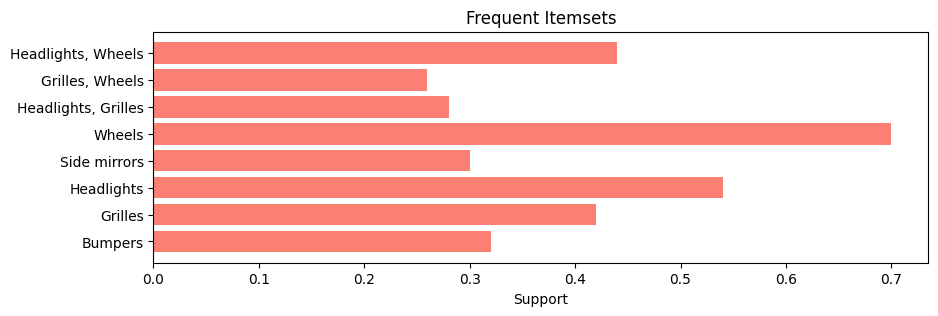

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Headlights),(Grilles),0.54,0.42,0.28,0.518519,1.234568,0.0532,1.204615,0.413043
1,(Grilles),(Headlights),0.42,0.54,0.28,0.666667,1.234568,0.0532,1.380000,0.327586
2,(Grilles),(Wheels),0.42,0.70,0.26,0.619048,0.884354,-0.0340,0.787500,-0.183983
3,(Wheels),(Grilles),0.70,0.42,0.26,0.371429,0.884354,-0.0340,0.922727,-0.303571
4,(Headlights),(Wheels),0.54,0.70,0.44,0.814815,1.164021,0.0620,1.620000,0.306324
5,(Wheels),(Headlights),0.70,0.54,0.44,0.628571,1.164021,0.0620,1.238462,0.469697


In [4]:
rule_ext = apriori_rules(df=df, column='Exterior components to customise', min_support=0.25, plot=True, figsize=(10,3))
rule_ext

In [5]:
rule_ext = rule_ext[rule_ext['lift'] >= 1]
rule_ext.sort_values(by='antecedent support', ascending=False)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5,(Wheels),(Headlights),0.70,0.54,0.44,0.628571,1.164021,0.0620,1.238462,0.469697
0,(Headlights),(Grilles),0.54,0.42,0.28,0.518519,1.234568,0.0532,1.204615,0.413043
4,(Headlights),(Wheels),0.54,0.70,0.44,0.814815,1.164021,0.0620,1.620000,0.306324
1,(Grilles),(Headlights),0.42,0.54,0.28,0.666667,1.234568,0.0532,1.380000,0.327586


## **<u>ANALYSIS</u>**

- Wheels are likely to be the most popular exterior component to customise a car, with headlights being at 54% chance to be customised together with wheels.

<br>

### **<u>Interior components to customise car</u>** ###

   support                              itemsets  length
1     0.68                           (Dashboard)       1
3     0.56                      (Steering wheel)       1
0     0.46                  (Centre compartment)       1
6     0.36           (Dashboard, Steering wheel)       2
2     0.30                        (Door handles)       1
4     0.26       (Centre compartment, Dashboard)       2
5     0.26  (Centre compartment, Steering wheel)       2


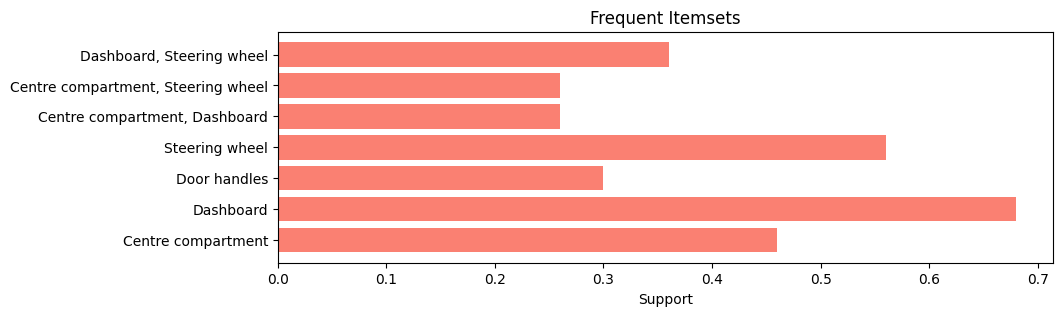

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Centre compartment),(Dashboard),0.46,0.68,0.26,0.565217,0.831202,-0.0528,0.736000,-0.273292
1,(Dashboard),(Centre compartment),0.68,0.46,0.26,0.382353,0.831202,-0.0528,0.874286,-0.388235
2,(Centre compartment),(Steering wheel),0.46,0.56,0.26,0.565217,1.009317,0.0024,1.012000,0.017094
3,(Steering wheel),(Centre compartment),0.56,0.46,0.26,0.464286,1.009317,0.0024,1.008000,0.020979
4,(Dashboard),(Steering wheel),0.68,0.56,0.36,0.529412,0.945378,-0.0208,0.935000,-0.152941
5,(Steering wheel),(Dashboard),0.56,0.68,0.36,0.642857,0.945378,-0.0208,0.896000,-0.116071


In [8]:
rule_int = apriori_rules(df=df, column='Interior components to customise', min_support=0.25, plot=True, figsize=(10,3))
rule_int

## **<u>ANALYSIS</u>**

- Dashboard is likely to be the most popular interior component to customise with a followed up of street wheel for subsequent customisation

<br>

## **<u>Deciding Factor to buy car + Exterior + Interior Personalization</u>**

In [19]:
df = pd.read_csv('../data/cleaned_data.csv')
df.head(1)

,Respondent ID,Age group,Gender,Category,Marital status,Deciding factors to buy car,Likelihood of customised vehicle if FOC,Exterior components to customise,Interior components to customise,Customisation Budget,Interest in personalising car,Personalisation Budget,Any cadding experience,Singaporean design idea feedback
0,bc57816c-afed-4fab-b853-29e1a685b3c0,20-30,Male,"Do not own a car, but planning to purchase in ...",Single,Price;Functionality;Size;Customisable options,Very likely,Grilles,Centre compartment,100-500,Only with professional help,500-1000,"No, I would need a designer to model my sketch",NaN


    support                         itemsets  length
4      0.88                          (Price)       1
6      0.70                         (Wheels)       1
1      0.68                     (Brand name)       1
2      0.68                      (Dashboard)       1
3      0.68                  (Functionality)       1
5      0.64         (Technological features)       1
0      0.62                     (Aesthetics)       1
7      0.62              (Brand name, Price)       2
10     0.62                  (Wheels, Price)       2
8      0.60           (Functionality, Price)       2
9      0.60  (Technological features, Price)       2


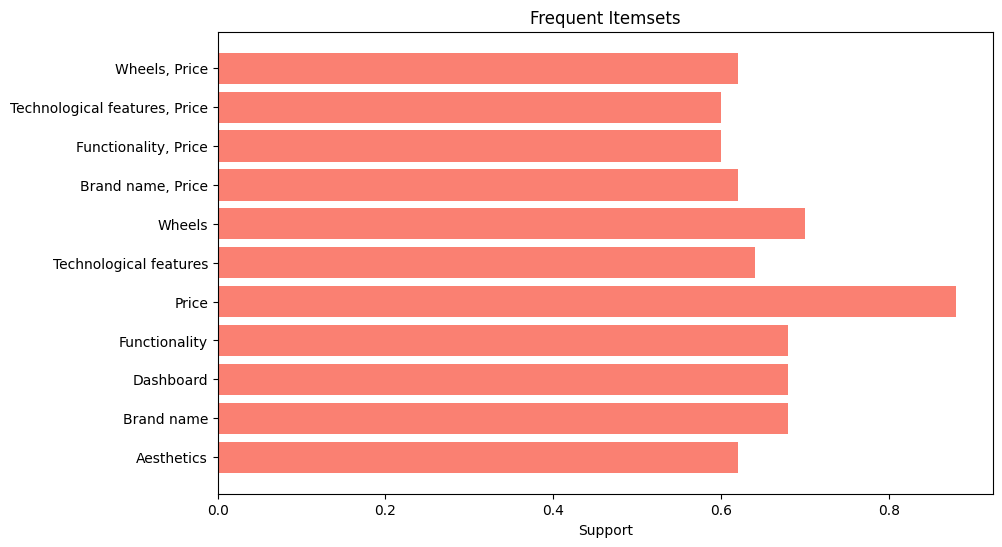

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Brand name),(Price),0.68,0.88,0.62,0.911765,1.036096,0.0216,1.360000,0.108871
1,(Price),(Brand name),0.88,0.68,0.62,0.704545,1.036096,0.0216,1.083077,0.290323
2,(Functionality),(Price),0.68,0.88,0.60,0.882353,1.002674,0.0016,1.020000,0.008333
3,(Price),(Functionality),0.88,0.68,0.60,0.681818,1.002674,0.0016,1.005714,0.022222
4,(Technological features),(Price),0.64,0.88,0.60,0.937500,1.065341,0.0368,1.920000,0.170370
5,(Price),(Technological features),0.88,0.64,0.60,0.681818,1.065341,0.0368,1.131429,0.511111
6,(Wheels),(Price),0.70,0.88,0.62,0.885714,1.006494,0.0040,1.050000,0.021505
7,(Price),(Wheels),0.88,0.70,0.62,0.704545,1.006494,0.0040,1.015385,0.053763


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori, association_rules

df = pd.read_csv('../data/cleaned_data.csv')

data = {}
data['int'] = df['Interior components to customise'].tolist()
data['ext'] = df['Exterior components to customise'].tolist()
data['purchaseFactor'] = df['Deciding factors to buy car'].tolist()
# data['cat'] = df['Category'].tolist()

df = pd.DataFrame(data)

# Combine data from all columns into a single list for each row
combined_data = df.apply(lambda row: ';'.join(row.dropna()), axis=1).apply(lambda x: x.split(';'))

# Use TransactionEncoder to transform the combined data into a format suitable for Apriori
te = TransactionEncoder()
te_ary = te.fit_transform(combined_data)
factors_df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm
min_support = 0.6
min_threshold = 0.7

frequent_itemsets = apriori(factors_df, min_support=min_support, use_colnames=True)
frequent_itemsets['length'] = frequent_itemsets['itemsets'].apply(len)
print(frequent_itemsets.sort_values(by='support', ascending=False))

plt.figure(figsize=(10,6))
support_values = frequent_itemsets['support']
itemsets = frequent_itemsets['itemsets'].apply(lambda x: ', '.join(x))
plt.barh(itemsets, support_values, color='salmon')
plt.xlabel('Support')
plt.title('Frequent Itemsets')
plt.show()

rules = association_rules(frequent_itemsets, metric="lift", min_threshold=min_threshold)
rules
